<a href="https://colab.research.google.com/github/Teraces12/LebedeNgartera/blob/main/Navier_Stokes_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"The Weak form of Navier-Stokes equation in Python"**
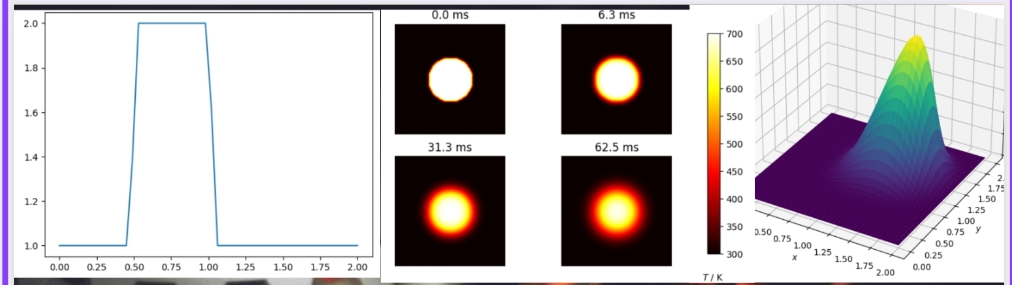

##**A) Introduction:**
The Weak Form of the Navier-Stokes equations is a mathematical framework used to describe the motion of incompressible fluid flows. This computational approach provides a flexible and efficient way to simulate fluid dynamics, making it a key tool in various engineering and scientific applications. This project aims to implement the Weak Form of the Navier-Stokes equations using the Python programming language.

##**B) Objective:**
The primary goal of this project is to develop a Python-based numerical solver for the Weak Form of the Navier-Stokes equations. By adopting the weak formulation, the project seeks to enhance the efficiency and adaptability of the simulation, making it suitable for a range of fluid flow scenarios. The implementation will leverage numerical methods and finite element techniques to approximate the solution to the governing equations.


The Navier -Stokes equations describe anything that flows in the universe. That include water, air, heating, smog, ..., everything.

$$\frac{\partial \vec{u}}{\partial t} +(\vec{u}\cdot\vec{\nabla})\vec{u} = -\frac{\vec{\nabla}P}{\rho}+\nu\vec{\nabla}^2\vec{u} + \sum\vec{F}_{\textrm{ext}}
  \ \ \ \textbf{(1)}$$


$$\vec{\nabla}.\vec{u} = 0 \ \ \ \ \ \ \ \ \ \ \textbf{(2)}$$

where $\textbf{(1)}$ is the set of Navier-Stokes equations, representing the balance of the  momentum,

and $\textbf{(2)}$ is the continuity equation (conservation of mass);

 $\vec{u} =(u,v,w,t)$ is the velocity field,

 $p$ is the hydrostatic pressure field,

 $\rho$
is the fluid mass density,

$\mu$ is fluid viscosity and

 $\sum\vec{F}_{\textrm{ext}} $ is the density of external forces applied to the fluid.


The sum of the forces $\sum\vec{F}_{\textrm{ext}}$ includes:

* **pressure forces;**
* **viscous forces;**
* **gravity force.**

$(\vec{u}\cdot\vec{\nabla})\vec{u}$   is **convection term**, and

$ \nu\vec{\nabla}^2\vec{u}$    is **diffusion term**


If  **convection term**  $<$  **diffusion term**, we get **smood flows**;

If  **convection term** $>$ **diffusion term** , we get **turbulent flows**.


The nabla operator $$\nabla f =(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}) f = \frac{\partial f}{\partial x}i + \frac{\partial f}{\partial y}j+ \frac{\partial f}{\partial z}k$$

$$ \nabla F =(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}).(F_{x},F_{y},F_{z}) = \frac{\partial F_{x}}{\partial x} + \frac{\partial F_{y}}{\partial y}+ \frac{\partial F_{z}}{\partial z}$$


The nabla operator applied to equation $\textbf{(1)}$ under certain conditions gives us the following equations:



$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0,      \ \  \ \ \ \ \textbf{1-D Linear Convection} ,$$



$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0,  \ \   \ \ \textbf{Nonlinear 1-D convection} $$


$$\frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial t^2} \qquad\qquad\qquad\qquad \textbf{ 1-D Diffusion} $$

$$
  \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2} \qquad\qquad \textbf{Burgers’ Equation} $$


$$\frac{\partial u}{\partial t}+c\left(\frac{\partial u}{\partial x} + \frac{\partial u}{\partial y}\right) = 0,    \ \ \ \ \ \   \textbf{ 2-D Linear Convection} $$



$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}  = 0  \quad \textbf{and}\quad \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}  = 0 \qquad\qquad \textbf{2-D Nonlinear Convection}
$$

$$
	\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2} \qquad\qquad \textbf{2-D Diffusion}
$$

...


##**C) Implementation**
In this project, we going to implement finite-difference based numerical solutions to the Navier Stokes equations using python, making heavy use of the numpy and matplotlib libraries.


The finite difference technique involves approximating the differential operator by making use Taylor series expansions. Given a differentiable function $h(x)$, we can use the Taylor series to approximate the function around the point $x=x_0$
 as follows:

\begin{align}
h(x_0 + \Delta x) = h(x_0) + \Delta x\left.\dfrac{\partial h(x)}{\partial x}\right|_{x = x_0} + O(\Delta x^2) \label{eqn:Taylor}
\end{align}

# If $\Delta x$  is small enough, the higher order terms can be made negligibly small and hence we can rearrange terms in Equation  to approximate the derivative as

\begin{align}
\dfrac{\partial h(x)}{\partial x} = \dfrac{h(x + \Delta x) - h(x)}{\Delta x} + O(\Delta x) \label{eqn:TaylorDiff}
\end{align}

This is a fundamental result in the finite difference numerical scheme from which many other approximations to higher order derivatives can be derived.

##**D) 1-D Linear Convection**

We are going to implement the approximation shown in the previous equation
 using the simplest example of 1-D linear convection, i.e., the 1-D wave equation, which is given by

\begin{align}
\dfrac{\partial u}{\partial t} + c\dfrac{\partial u}{\partial x} = 0 \label{eqn:wave}
\end{align}

Here, $u(x, t)$ represents the velocity at position $x$ and time $t$, and $c$ is the  wave propagation speed. We first discretize $t$ and  $x$ into $t_0, t_1, \ldots, t_N$  and $ x_0, x_1, \ldots, x_M$ points respectively. let $t_{i+1} - t_{i} = \Delta t$ and $x_{j+1} - x_{j} = \Delta x$ for all $i \in {0, \ldots, N}$ and $i \in {0, \ldots, M}$, We use the notation $u_i^n$ to represent $u(x_i, t_n)$.
Then, using Equation  we have


\begin{align}
\dfrac{\partial u}{\partial t} & \approx \dfrac{u_i^{n+1}-u_{i}^n}{\Delta t} \label{eqn:timeapprox} \\
\dfrac{\partial u}{\partial x} & \approx \dfrac{u_i^n-u_{i-1}^n}{\Delta x} \label{eqn:xapprox}
\end{align}

\begin{align}
\dfrac{u_i^{n+1}-u_{i}^n}{\Delta t} + c\dfrac{u_i^n-u_{i-1}^n}{\Delta x} = 0 \label{eqn:wave-equation-discrete}
\end{align}

Note that we use a forward difference approximation for time and a backward difference approximation for space. We have therefore converted the wave equation from a differential equation to a system of algebraic equations which can be solved with standard matrix methods. Given appropriate initial and boundary conditions, the only unknown at each time point is $u^{n+1}_i$  and we can use a time-marching Euler scheme to solve for u at every discrete point in time and space.



To see this, consider the previous equation for the case $i= 1$ and $n=0$ (the case i=0 and
$n=0$ are known from initial and boundary conditions):

\begin{align}
\dfrac{u_1^{1}-u_{1}^0}{\Delta t} + c\dfrac{u_1^0-u_{0}^0}{\Delta x} = 0
\end{align}

which can rewritten as

\begin{align}
u_1^1 = u_1^0 -c\dfrac{\Delta t}{\Delta x}(u_1^0-u_{0}^0)
\end{align}

Because all the terms in the RHS are known, we can find $u_1^1$,  and extending this scheme, we find $u_2^1, u_3^1, \ldots, u_M^1$.  Having found the velocity all spatial grid points, we next march forward in time to $n=2$ and repeat the process, until $u$ is found for all time and space points in the grid.

We implement the above scheme by solving Equation ($\dfrac{u_i^{n+1}-u_{i}^n}{\Delta t} + c\dfrac{u_i^n-u_{i-1}^n}{\Delta x} = 0 $) using the initial conditions

\begin{align}
u(x, 0) =
\begin{cases}
2, 0.5 \leq x \leq 1, \\
1, \textrm{otherwise}
\end{cases} \label{eqn:ICs}
\end{align}

and the boundary condition u(0, t) = u(2, t) = 1

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [10]:
####### Initializing parameters
nx = 50
dx = 2 / (nx-1)
nt = 25
dt = .025
c = 1

# Setting up the initial and boundary conditions
u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and
                                     # 1 as per our I.C.s

# Calculating solution
un = u.copy()

for n in range(nt):  #loop for values of n from 0 to nt
    u[1:] = un[1:] - c * dt/ dx * (un[1:] - un[:-1])

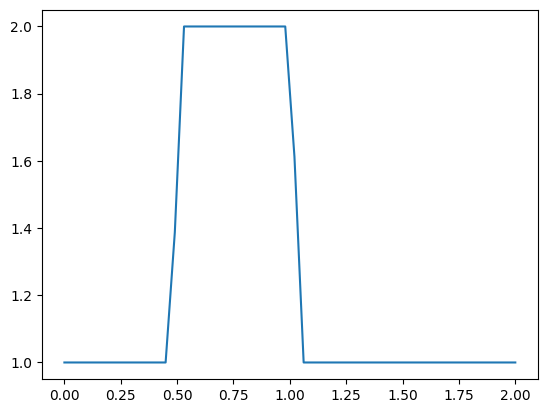

In [11]:
plt.plot(np.linspace(0, 2, nx), u);

Here we see something strange! Our initial conditions suggest that we had a square pulse, and given the nature of the wave equation (with no diffusion or convection for now), we would expect this square to simply translate along x with time, but we see a rounded square here! This has happened because of numerical diffusion: our values of $\Delta x$ were too large. Indeed, we can make $\Delta x$ smaller and check that the initial square pulse translates as a square.

We made some arbitrary choices around the values of $\Delta x$  and $\Delta t$. Playing with the code, you will see that for some values of the $\Delta x$  and $\Delta t$, the solution seems unstable and in reality, we need to be careful about the how we go about choosing $\Delta x$  and $\Delta t$.  We require that the distance traveled $u\Delta t$ travelled by the wave in the time interval $\Delta t$  be less than the chosen value of $\Delta x$ . There is detailed theory behind this, capture by the Courant-Friendrichs-Lewy (CLF) condition. Formally, we require

\begin{align}
\dfrac{u\Delta t}{\Delta x} \leq \sigma_\textrm{max}
\end{align}


Where $\sigma_\textrm{max} \leq 1$ is the Courant number whose value changes with the exact numerical method being used. For the explicit Euler scheme described above, $\sigma_\textrm{max} \approx 1$. We will see more about this later while looking at solving equations in higher dimensions.

##**E) The two-dimensional diffusion equation**

The two-dimensional diffusion equation is :

$$\frac{\partial U}{\partial t} = D\left(\frac{\partial^2U}{\partial x^2} + \frac{\partial^2U}{\partial y^2}\right)$$

where **D** is the diffusion coefficient. A simple numerical solution on the domain of the unit square $0\le x < 1, \quad 0 \le y < 1$ approximates $U(x,y;t)$ by the discrete function $u_{i,j}^{(n)}$ where $x=i\Delta x$, $x=j\Delta y$ and $x=t\Delta t$. Applaying finite different approximations yields

$\frac{u_{i,j}^{(n+1)} - u_{i,j}^{(n)}}{\Delta t} = D\left[ \frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}}{(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}}{(\Delta y)^2} \right],$

and hence the state of the system at time step $n+1$ , $u_{i,j}^{(n+1)}$ through the equation

$u_{i,j}^{(n+1)} = u_{i,j}^{(n)} + D\Delta t\left[ \frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}}{(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}}{(\Delta y)^2} \right].$

Consider the diffusion equation applied to a metal plate initially at temperature $T_\mathrm{cold}$. The following code applies the above formula to follow the evolution of the temperature of the plate. It can be shown that the maximum time step, $Δt$ that we  can allow without the process becoming unstable is

$\Delta t = \frac{1}{2D}\frac{(\Delta x\Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}$.

In the code below, each call to do-timestep updates numpy array $u$ from the result of the previous timestep, $u_0$. The simpliest approach to applying the partial difference equation is to use a Python loop:

0 1
10 2
50 3
100 4


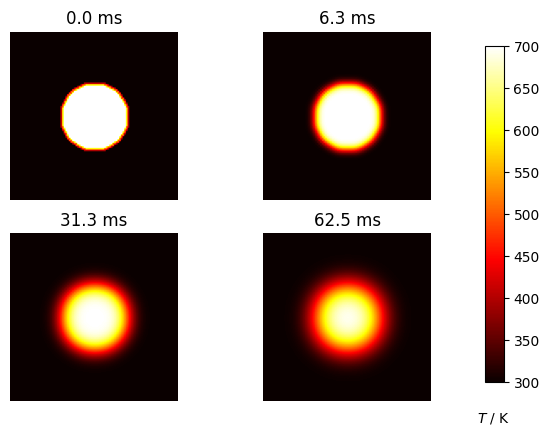

In [12]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

To set a common colorbar for the four plots we define its own Axes, cbar_ax and make room for it with fig.subplots_adjust. The plots all use the same colour range, defined by vmin and vmax, so it doesn't matter which one we pass in the first argument to fig.colorbar.

The state of the system is plotted as an image at four different stages of its evolution.

##**F) 2-D Burgers’ Equation**

The **2-D** Burgers' equation put together **2-D** nolineaire convection and diffusion. the equations for $u$ and $v$ are

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$ \\

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)
$$

There can be discretized and rearranged (after some algebra!) to obtain

\begin{align}
\nonumber u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) + \\
& \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{align}

\begin{align}
\nonumber v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{align}

We implement the solution below:

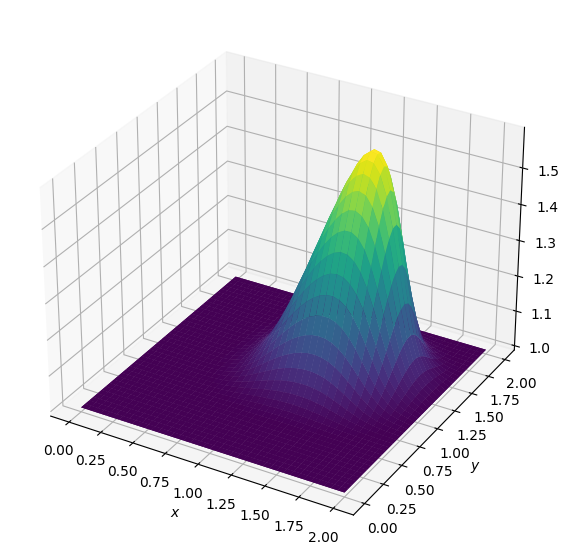

In [13]:
#from matplotlib import cm
# Initialization
nx = 41
ny = 41
nt = 2000
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))

# Initial conditions
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] *
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] *
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) +
                     nu * dt / dx**2 *
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) +
                     nu * dt / dx**2 *
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

# Plot the solution
from matplotlib import cm
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

The initial pulse has been translated, sheared, and smeared, as expected by the different elements of the Burgers equation.

## Author

<a href="https://www.linkedin.com/in/lebede-ngartera-82429343?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BI8f5HtANSiWQt%2B1jRbg1pQ%3D%3D"> Dr Lebede Ngartera</a>